# Tutorial 08: Discrete Calculus

## PHYS 2600, Spring 2019

We're now getting to a point where there are usually several modules that we're going to be using repeatedly through the entire Jupyter notebook - `numpy` and `pyplot` as a bare minimum.

When multiple modules are being used, if we just import them as we need them, then it's harder to read exactly what modules are needed to run our notebook.  And if we restart the kernel, we have to remember to re-run all the cells, or go and look for where our `import` statements were...

A common practice is to instead have an __import cell__ at the _very top_ of our notebook, where we gather all the import statements together - which I'll start doing now!

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d  # see T8.1B for first use

## T8.1 - Working with interpolations

Let's begin with the interpolation example from lecture, constructing an interpolation of the cosine function.  Here's the code I used again:

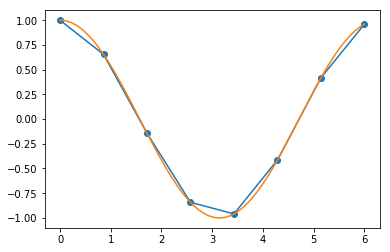

In [3]:
# Plotting cos on two different discretizations of (0,6)

x_coarse = np.linspace(0,6,8)
x_fine = np.linspace(0,6,10000)

plt.plot(x_coarse,np.cos(x_coarse),marker='o')
plt.plot(x_fine,np.cos(x_fine))

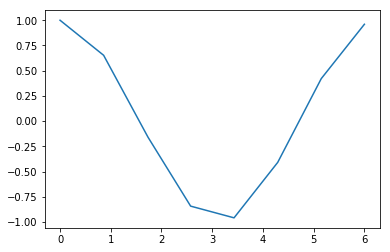

In [4]:
# Using np.interp() to build a linear interpolation on the fine grid x_fine

lin_cos = np.interp(x_fine, x_coarse, np.cos(x_coarse))
plt.plot(x_fine, lin_cos)

### Part A

From the plot, it's obvious that our array `lin_cos` isn't a very good approximation to `cos(x)`.  Since we know exactly the right answer, we can quantify how bad the approximation is by looking at the difference.  The difference between `cos(x)` and the reconstructed interpolation `lin_cos` is an example of a __discretization error__.

__Plot the difference between `lin_cos` and the correct answer `cos(x_fine)`__ in the cell below.  Notice that there are regularly-spaced points where the error is zero - those are exactly where our coarse grid was, of course.  Make the connection more obvious by __plotting the points `(x_coarse, np.zeros_like(x_coarse))`__ on the same plot.  

_(Hint: to draw just points, the `plt.scatter(x,y)` command is quicker than using `plt.plot()` and turning the lines off.)_


(-0.1, 0.1)

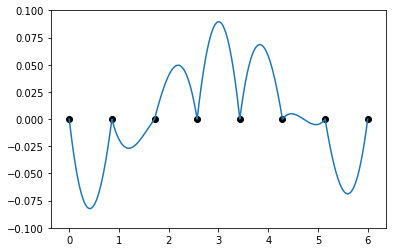

In [5]:
### BEGIN SOLUTION
plt.plot(x_fine, lin_cos - np.cos(x_fine))
plt.scatter(x_coarse, np.zeros_like(x_coarse), color='k')
plt.ylim(-0.1,0.1)
### END SOLUTION

### Part B

One way to reduce discretization error would just be to use a finer grid.  (Like `x_fine`, which is still a discretization - it's just such a fine grid that the discrepancies with the continuous `cos(x)` aren't visible on our plots.)  However, this isn't always practical: sometimes computing `f(x)` is very expensive, or maybe we got `f(x)` from an experiment and we'd have to go back into the lab to add more points (which can be a different kind of expensive!)

Another possiblility is to use a _better interpolation algorithm_.  Although `numpy` only offers a simple linear interpolation, the `scipy.interpolate` module has [a wealth of options](https://docs.scipy.org/doc/scipy/reference/interpolate.html)!  We'll learn how to use one, the `interp1d` function.

Since we're only using a single function, I'll use the `from` import notation so we can use it without typing dots everywhere.  __Read the documentation for `interp1d`__ (use `?` or my link above), and then __use `interp1d` with the 'cubic' interpolation method__ to build an array `cubic_cos`, which should be reconstructed from `x_coarse` on the grid `x_fine` (just like `lin_cos` above.)

_(Important hint: check carefully what `interp1d` returns as a result - it does NOT work the same way as `np.interp`!)_



In [6]:
# Remember: I imported `interp1d` already in the import cell at the top, as:
# `from scipy.interpolate import interp1d`
# Since we used "from" notation, it's available as simply `interp1d` - no dots needed.

### BEGIN SOLUTION
# Note that interp1d gives us a function, not an array!
cubic_cos_f = interp1d(x_coarse, np.cos(x_coarse), kind='cubic')

# Now we call the function on x_fine to make the array we want.
cubic_cos = cubic_cos_f(x_fine)
### END SOLUTION


In [7]:
import numpy.testing as npt

assert len(cubic_cos) == len(lin_cos)

# The cubic interpolation should lie within 0.01 of the true value of cos(x)
npt.assert_allclose(cubic_cos, np.cos(x_fine), atol=0.01)

Now __plot the difference between `cubic_cos` and `cos(x_fine)`__.  Compare to the same plot you made above for the linear interpolation, and notice the similarities and differences.  

(For easier comparison, you might want to add `plt.ylim(-0.1,0.1)` in both plot cells, so you can see them on the same y-range.)

(-0.1, 0.1)

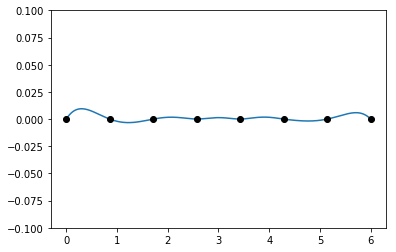

In [8]:
### BEGIN SOLUTION
plt.plot(x_fine,cubic_cos - np.cos(x_fine))
plt.plot(x_coarse, np.zeros_like(x_coarse), linestyle=' ', marker='o', color='k')
plt.ylim(-0.1,0.1)
### END SOLUTION

The interpolating method you just used is called "__cubic spline__", and it's basically a fancier version of linear interpolation, except it fits a cubic function to sets of four points, instead of a linear function to pairs.  Since it's using more information at each point, and since it has a more complicated functional form, it gives a smoother and generally closer approximation to `cos(x)`.

### Part C

On the other hand, there are sometimes drawbacks to the cubic spline or other fancy interpolations that you should be aware of!  Let's have a look at another example.  In the cell below, I've set up a coarse and fine grid for you of the range `-5 <= x <= 5`, and we'll be looking at the Gaussian function $f(x) = e^{-x^2}$.

Here's the setup and a plot of the Gaussian on our fine grid:

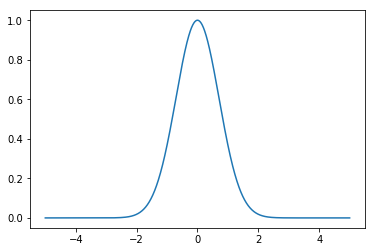

In [9]:
xc2 = np.linspace(-5,5,7)
xf2 = np.linspace(-5,5,1000)
def gaussian(x):
    return np.exp(-x**2)

plt.plot(xf2, gaussian(xf2))

Now __make a linear interpolation `gauss_lin`__ (using `np.interp`) and __a cubic interpolation `gauss_cube`__ (using `interp1d` with `'cubic'` kind) in the cell below.

Then, __plot both interpolations, along with the true function `gaussian()`, on the fine grid `xf2`__ and see how they compare!

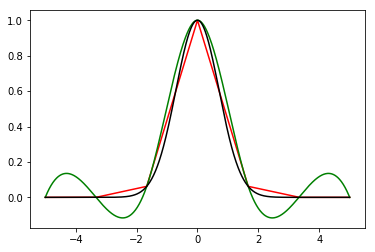

In [10]:
### BEGIN SOLUTION
gauss_lin = np.interp(xf2, xc2, gaussian(xc2))

gauss_cube_f = interp1d(xc2, gaussian(xc2), kind='cubic')
gauss_cube = gauss_cube_f(xf2)

plt.plot(xf2, gauss_lin, color='r')
plt.plot(xf2, gauss_cube, color='g')
plt.plot(xf2, gaussian(xf2), color='k')
### END SOLUTION

Notice what happened this time: although the cubic spline does a little bit better in approximating the Gaussian function in the middle, it's _greatly_ overestimating the amount of curvature in the flat tails of the function.  So in fact, the _linear_ interpolation is more accurate outside $|x| > 2$ or so!

This is an example of __overfitting__ in action: although the Gaussian function is very flat at large $x$, the cubic functions we're interpolating with can have the freedom to fluctuate more while still passing through the same points.

## T8.2 - Starting out with numerical integrals

### Part A

Let's warm up by trying out a numerical integral on a case where we happen to know the exact answer: 

$$
\int_0^{\pi/2} dx\ \cos(x) = 1.
$$

__Use the `np.trapz` trapezoidal-rule integrator__ to do the integral, using the grid of points `x_int_cos` I've given you below.

(Notice how close your answer is, even with a grid of only 10 points!  __How many points do you need to get 1 within a precision of 0.0001?__)

In [11]:
x_int_cos = np.linspace(0, np.pi/2, 10)

### BEGIN SOLUTION
I_cos = np.trapz(np.cos(x_int_cos), x=x_int_cos)
print(I_cos)

# 50 points in the linspace should get you the answer 0.9999..., which is within 0.0001 of the right answer.
### END SOLUTION


0.9974602317917259


### Part B

Now let's go back to the example integral from class:

\\[
\int_0^\infty dx \frac{1}{(e^x+1)^2} =\ I
\\]

I showed one way to deal with the indefinite interval, which was to change variables to $u=1/(1+e^x)$; then $u$ has a finite numerical interval to deal with.

There are two other ways we can try to compute indefinite integrals.  The first is to __cutoff and extrapolate__: we can instead calculate the result

\\[
I_L = \int_0^L dx\ \frac{1}{(e^x + 1)^2}
\\]
and then try to make $L$ big enough that we get close to the right answer.

__Implement the function `cutoff_int(L, n)` below__, which uses `np.trapz` to calculate the integral $I_L$ for a given $L$, taking a grid of $n$ points.  


In [12]:
def f(x):
    return 1/(1+np.exp(x))**2

def cutoff_int(L, n=100):
    ### BEGIN SOLUTION
    x = np.linspace(0,L,n)
    integrand = f(x)
    
    return np.trapz(integrand, x=x)
    ### END SOLUTION
    
    
print(cutoff_int(100))  # Correct integral is about 0.194...but this probably won't match!

0.2145941271034787


Now __run the cell below__ to plot the integral vs. the cutoff value, for a cutoff ranging from 1 up to 1 million, keeping $n=100$ fixed.

_Note:_ this introduces a handy new function, __`np.vectorize`__.  Since `cutoff_int` is implemented to work on a _single value_ of `L`, you can't use it on an array as-is.  But the `np.vectorize` function takes a regular function, and _converts_ it to a NumPy-aware function that will work on a whole array at once.

/opt/jupyterhub/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  


Text(0, 0.5, 'integral w/cutoff L')

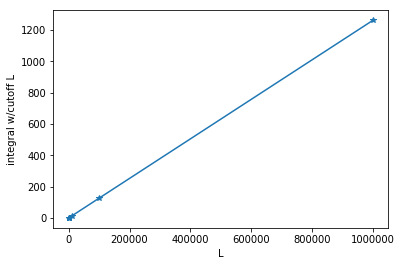

In [13]:
L_array = np.array([1, 10, 100, 1e3, 1e4, 1e5, 1e6])
cutoff_int_V = np.vectorize(cutoff_int)

I_array = cutoff_int_V(L_array)
plt.plot(L_array, I_array, marker='*')
plt.xlabel('L')
plt.ylabel('integral w/cutoff L')

The integral is blowing up as we extend the cutoff further and further!  Our result is __unstable__ under extrapolation, so we can't get a sensible answer for the indefinite integral.

What you're seeing is a symptom of discretization getting worse, because _we kept the number of points $n$ fixed_.  It's instructive to plot the function at relatively small $x$:

Text(0, 0.5, 'f(x)')

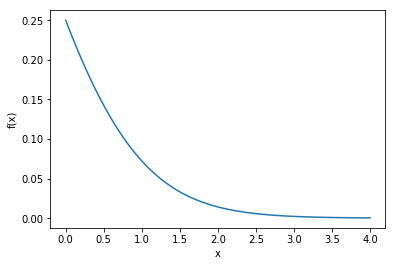

In [14]:
x = np.linspace(0,4,100)
plt.plot(x, 1/(1+np.exp(x))**2)
plt.xlabel('x')
plt.ylabel('f(x)')

We can immediately see a couple of things.  First, __most of the value of the integral is coming from the function near $x=0$__; already by $x=3$, the integrand is basically zero by eye.  So the divergence above isn't real; it's a symptom of trying to cover the range from 0 to 1,000,000 with only 100 points, which results in enormous errors right where the function is actually changing significantly.

One solution is just to go back up and make $n$ bigger; give it a try.  You should be able to stabilize your results for smallish $L$, at least, without making $n$ too gigantic.  But this will start to be slow if you push the cutoff too far.  If you encounter this sort of problem in the wild, __always look for an integral transform first__!  But, a more thoughtful approach can make things easier, as shown below!

### Part C (optional challenge)

A smarter way to deal with this without transforming variables is __divide and conquer__.  Since we notice that the integral will be dominated by the function near $x=0$, it would be sensible to deal with it precisely in a region close to 0, and then lower our precision further away.  So we can divide the integral up like this:

\\[
I_{DC} = \int_0^K dx\ f(x) + \int_K^L dx\ f(x)
\\]

where $L$ is still our overall cutoff, but we introduce a second point $x=K$, known as the __breakpoint__.  If we keep $K$ relatively small, we can ensure a fine grid in the region where it counts, and then extrapolate the cutoff $L$ away with small errors.




This has two advantages: one, it will improve our estimate when $L$ is relatively small; and two, the asymptotic answer gives us a good handle on how fast we expect our answer to converge to the right one, so we don't need to take $L$ arbitrarily large.

__Implement the function `divide_conquer_int(L, n, K)` below__, and make sure you get the right answer (-1/2 + log(2)) for the default values of $n$ and $K$ and a reasonably large cutoff $L$.  Use $n$ points for each of the two linspaces (from 0 to K and K to L), to keep the behavior simple.



In [15]:
def divide_conquer_int(L, n=100, K=4.0):
    ### BEGIN SOLUTION
    x1 = np.linspace(0,K,n)
    x2 = np.linspace(K,L,n)
    
    I_1 = np.trapz(f(x1), x=x1)
    I_2 = np.trapz(f(x2), x=x1)
    
    return I_1 + I_2

print(divide_conquer_int(100))
print(-0.5 + np.log(2))
 
### END SOLUTION
    
    

0.19302617011212134
0.1931471805599453


Finally, __run the cell below__ to plot $I_{DC}$ vs. $I_L$ for various $L$, and compare how the convergence has improved.

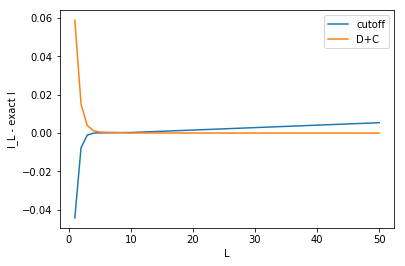

In [16]:
L_array = np.array([1,2,3,4,5,10,50])

dc_int_V = np.vectorize(divide_conquer_int)

IC_array = cutoff_int_V(L_array)
IDC_array = dc_int_V(L_array)

exact_I = -0.5 + np.log(2)
plt.plot(L_array, IC_array-exact_I, label='cutoff')
plt.plot(L_array, IDC_array-exact_I, label='D+C')

plt.xlabel('L')
plt.ylabel('I_L - exact I')
plt.legend()

Our result from divide and conquer is nice and stable as the cutoff increases, and quickly approaches the exact answer (even beating the cutoff-only method at small $L$.)

Another variation on divide-and conquer would be to replace $f(x)$ with an easier _approximation_ further away.  For sufficiently large $x$, we notice that

\\[
\frac{1}{(1+e^x)^2} \approx \frac{1}{(e^x)^2} = e^{-2x}
\\]

which is a much simpler function to integrate by hand:

\\[
\int_L^\infty dx\ e^{-2x} = -\left. \frac{1}{2} e^{-2x}\right|_L^\infty = \frac{1}{2} e^{-2L}
\\]

So we could combine our cutoff integral above with the asymptotic result:
\\[
I \approx I_L + \frac{1}{2} e^{-2L}.
\\]

This will help the convergence of the cutoff-only method, but we still run into trouble if we make $L$ too big without compensating by adjusting $n$.
